# Heatmap Generation

This Python code utilizes Datashader to generate heatmaps by aggregating and rendering data points. The input for this code is a CSV file containing point location data, including the count of plastic and trash bins. The code output will be a heatmap, providing a clear visualization of the distribution of plastic items. While plastic distribution is visualized as a heatmap, trash bin distribution is visualized as a buffered points.

Input data to the heatmap generating function should be a CVS file with 4 columns

1.   Image location latitude
2.   Image location logitude
3.   Detected plastic count in the image
4.   Detected trash bin count in the image



*Tested in Googlelab (https://research.google.com/colaboratory/)*

### 1/2) Installing and Inporting Libaries

In [ ]:
''' Install datashader for mapping, if it's not installed'''
# !pip install datashader

In [2]:
import pandas as pd
import datashader as ds

from colorcet import fire
import datashader.transfer_functions as tf
import plotly.express as px

### 2/2) Generating Heatmaps

In [21]:
'''Function for generating heatmap'''

def generateHeatMaps(csv_file_path, lon_col, lat_col, plastic_count_col, bin_count_col):

  """
  This function generates a heatmap from a CSV file containing location, plastic, and trash bin counts.

  :param csv_file_path: path CSV file containing location, plastic, and trash bin counts
  :param lon_col: latitude column of the CSV file
  :param lat_col: longitude column of the CSV file
  :param plastic_count_col: plastic count column of the CSV file
  :param bin_count_col: trash bin count column of the CSV file
  """

  csv_df = pd.read_csv( csv_file_path )

  df_latlon_plastic = {'lon': [], 'lat': []}
  df_latlon_bin = {'lon': [], 'lat': []}

  for index1, row1 in csv_df.iterrows():

    df_latlon_plastic['lon'] = df_latlon_plastic['lon'] + [row1[lon_col] for i1 in range(int(row1['plastic_c']))]
    df_latlon_plastic['lat'] = df_latlon_plastic['lat'] + [row1[lat_col] for i1 in range(int(row1['plastic_c']))]

    df_latlon_bin['lon'] = df_latlon_bin['lon'] + [row1[lon_col] for i1 in range(int(row1['bin_c']))]
    df_latlon_bin['lat'] = df_latlon_bin['lat'] + [row1[lat_col] for i1 in range(int(row1['bin_c']))]

  df_latlon_plastic = pd.DataFrame(df_latlon_plastic)
  df_latlon_bin = pd.DataFrame(df_latlon_bin)

  cvs = ds.Canvas(plot_width=500, plot_height=500)
  agg = cvs.points(df_latlon_plastic, x='lon', y='lat')
  img_p = tf.shade(agg, cmap=fire)[::-1].to_pil()

  # Corners cordninates to be passed to mapbox
  coords_lat, coords_lon = agg.coords['lat'].values, agg.coords['lon'].values
  coordinates = [[coords_lon[0], coords_lat[0]],
                [coords_lon[-1], coords_lat[0]],
                [coords_lon[-1], coords_lat[-1]],
                [coords_lon[0], coords_lat[-1]]]

  fig1 = px.scatter_mapbox(df_latlon_bin, lat='lat', lon='lon', opacity=1, zoom=11)
  fig1.update_layout(mapbox_style="carto-darkmatter", mapbox_layers = [{"sourcetype": "image", "source": img_p, "coordinates": coordinates}])
  fig1.update_traces(marker={"color": 'grey', 'size': 15})
  fig1.show()


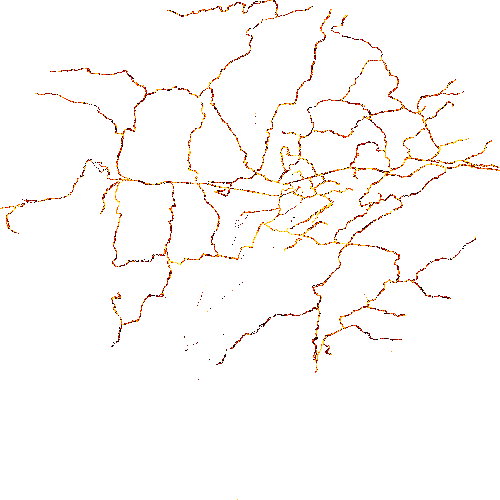

In [22]:
generateHeatMaps('/content/Mawanella_January_2022_Sample.csv', 'lon', 'lat', 'plastic_c', 'bin_c')